In [5]:
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [175]:
#access extraction zip file
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
extract_zip = zipfile.ZipFile(local_zip,'r')
extract_zip.extractall('/content')
extract_zip.close()

base_dir = ('/content/rockpaperscissors/rps-cv-images') 

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.listdir(base_dir)


['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [176]:
batu_dir = os.path.join (base_dir,'rock')
gunting_dir = os.path.join (base_dir,'scissors')
kertas_dir = os.path.join (base_dir,'paper')



In [177]:
#membagi direktori sample batu menjadi train dan validasi
train_batu_dir,val_rock_dir = train_test_split(os.listdir(batu_dir), test_size=0.2)
#membagi direktori sample gunting menjadi train dan validasi
train_gunting_dir,val_gunting_dir = train_test_split(os.listdir(gunting_dir), test_size=0.2)
#membagi dirketori sample kertas menjadi train dan validasi
train_kertas_dir,val_kertas_dir = train_test_split(os.listdir(kertas_dir), test_size=0.2)

In [178]:
train_batu = os.path.join(train_dir, 'rock')
train_kertas = os.path.join(train_dir, 'paper')
train_gunting = os.path.join(train_dir, 'scissors')

val_batu = os.path.join(validation_dir,'rock')
val_kertas = os.path.join(validation_dir, 'paper')
val_gunting = os.path.join(validation_dir, 'scissors')

In [179]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)
 
train_generator = datagen.flow_from_directory(
        base_dir,  
        target_size=(100, 150), 
        batch_size=4,
        class_mode='categorical',
        subset='training')
 
validation_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        batch_size=4, 
        class_mode='categorical', 
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [181]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [182]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [186]:
#melatih model
model.fit(train_generator,
          steps_per_epoch = 25, #jumlah batch yang akan dieksekusi setiap epoch
          epochs=20,
          validation_data = validation_generator, #menampilkan akurasi pengujian data validasi
          validation_steps = 5,
          verbose = 2)

Epoch 1/20
25/25 - 4s - loss: 0.2462 - accuracy: 0.9400 - val_loss: 0.3318 - val_accuracy: 0.9000
Epoch 2/20
25/25 - 4s - loss: 0.3019 - accuracy: 0.8900 - val_loss: 0.2611 - val_accuracy: 0.9500
Epoch 3/20
25/25 - 4s - loss: 0.2381 - accuracy: 0.9300 - val_loss: 0.1027 - val_accuracy: 0.9500
Epoch 4/20
25/25 - 4s - loss: 0.3059 - accuracy: 0.9100 - val_loss: 0.1347 - val_accuracy: 1.0000
Epoch 5/20
25/25 - 4s - loss: 0.1789 - accuracy: 0.9592 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 6/20
25/25 - 4s - loss: 0.2607 - accuracy: 0.9100 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 7/20
25/25 - 4s - loss: 0.1559 - accuracy: 0.9500 - val_loss: 0.1478 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 4s - loss: 0.0575 - accuracy: 0.9900 - val_loss: 0.2192 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 4s - loss: 0.1544 - accuracy: 0.9800 - val_loss: 0.3507 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 4s - loss: 0.2245 - accuracy: 0.9400 - val_loss: 0.3483 - val_accuracy: 0.9500
Epoch 11/20
25/25 -

Saving BwX4LCp8V8FlquK1.png to BwX4LCp8V8FlquK1.png
BwX4LCp8V8FlquK1.png
Scissors


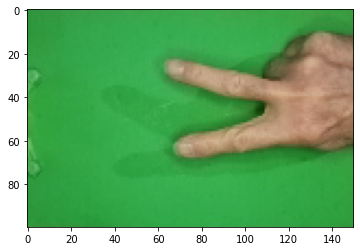

In [187]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=5)

  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print("Scissors")
  else:
     print("Invalid Image")
     



In [1]:
print(train_generator.class_indices) 

NameError: name 'train_generator' is not defined